In [163]:
from SafeTransformer import SafeTransformer
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor

In [164]:
import pandas as pd

In [165]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from SafeTransformer import SafeTransformer

In [166]:
surrogate_model = GradientBoostingRegressor(n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    loss='huber')

In [167]:
data = load_boston()

In [169]:
X = pd.DataFrame(data.data, columns=data.feature_names)

In [178]:
y = data.target

In [179]:
from sklearn.linear_model import LinearRegression

pens = np.linspace(0.01, 10, 25)
best_score = float('Inf')
best_pen = 0
X_train, X_test, y_train, y_test = train_test_split(X, y)
        

In [180]:
X_train_df = pd.DataFrame(X_train)

X_test_df = pd.DataFrame(X_test)

linear_model = LinearRegression()
safe_transformer = SafeTransformer(surrogate_model, penalty = 0.84)
pipe = Pipeline(steps=[('safe', safe_transformer), ('linear', linear_model)])
pipe = pipe.fit(X_train_df, y_train)
predictions = pipe.predict(X_test)

mean_squared_error(y_test, predictions)


Fitting variable:CRIM
Fitting variable:ZN
Fitting variable:INDUS
Fitting variable:CHAS
Fitting variable:NOX
Fitting variable:RM
Fitting variable:AGE
Fitting variable:DIS
Fitting variable:RAD
Fitting variable:TAX
Fitting variable:PTRATIO
Fitting variable:B
Fitting variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT


21.326366321954843

In [181]:
linear_model_standard = LinearRegression()
linear_model_standard = linear_model_standard.fit(X_train, y_train)
standard_predictions = linear_model_standard.predict(X_test)

mean_squared_error(y_test, standard_predictions)

32.575005536863692

# Further model optimization

In [182]:
errors = []
surrogate_model = surrogate_model.fit(X_train, y_train)
for pen in pens:
    safe_transformer = SafeTransformer(surrogate_model, penalty = pen)

    safe_transformer = safe_transformer.fit(pd.DataFrame(X_train))

    X_train_transformed = safe_transformer.transform(X_train)

    X_test_transformed = safe_transformer.transform(X_test)

    linear_model_transformed = LinearRegression()

    linear_model_transformed = linear_model_transformed.fit(X_train_transformed, y_train)

    surrogate_predictions = linear_model_transformed.predict(X_test_transformed)
    error = mean_squared_error(y_test, surrogate_predictions)
    errors.append(error)
    print(mean_squared_error(y_test, standard_predictions), error)
    if error < best_score:
        best_score = error
        best_pen = pen

Fitting variable:CRIM
Fitting variable:ZN
Fitting variable:INDUS
Fitting variable:CHAS
Fitting variable:NOX
Fitting variable:RM
Fitting variable:AGE
Fitting variable:DIS
Fitting variable:RAD
Fitting variable:TAX
Fitting variable:PTRATIO
Fitting variable:B
Fitting variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT
32.5750055369 43.8751817616
Fitti

Fitting variable:B
Fitting variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT
32.5750055369 17.6609954432
Fitting variable:CRIM
Fitting variable:ZN
Fitting variable:INDUS
Fitting variable:CHAS
Fitting variable:NOX
Fitting variable:RM
Fitting variable:AGE
Fitting variable:DIS
Fitting variable:RAD
Fitting variable:TAX
Fitting variable:PTRATIO
Fitti

Fitting variable:ZN
Fitting variable:INDUS
Fitting variable:CHAS
Fitting variable:NOX
Fitting variable:RM
Fitting variable:AGE
Fitting variable:DIS
Fitting variable:RAD
Fitting variable:TAX
Fitting variable:PTRATIO
Fitting variable:B
Fitting variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT
Transforming variable:CRIM
Transforming variable:ZN
Transforming variable:INDUS
Transforming variable:CHAS
Transforming variable:NOX
Transforming variable:RM
Transforming variable:AGE
Transforming variable:DIS
Transforming variable:RAD
Transforming variable:TAX
Transforming variable:PTRATIO
Transforming variable:B
Transforming variable:LSTAT
32.5750055369 16.0066354118
Fitting variable:CRIM
Fitti

In [183]:
gb_predictions = surrogate_model.predict(X_test)
print(mean_squared_error(y_test, gb_predictions))

10.7571948702


In [184]:
import matplotlib.pyplot as plt

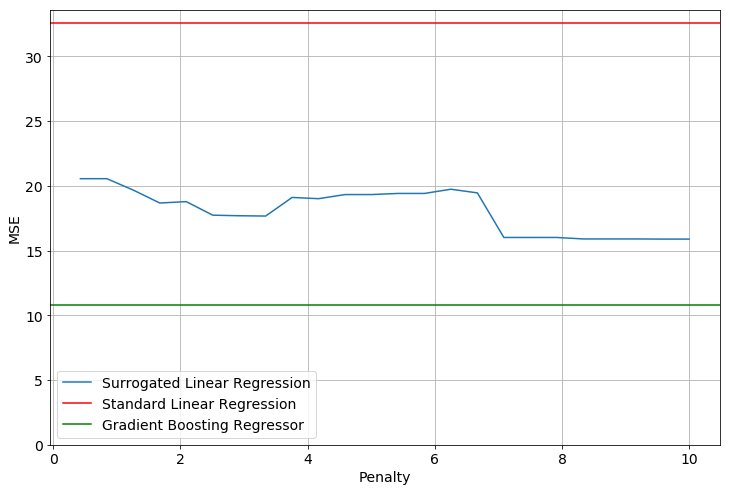

In [185]:
standard_error = mean_squared_error(y_test, standard_predictions)
xgb_error = mean_squared_error(y_test, gb_predictions)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 14})
plt.plot(pens[1:], errors[1:], label='Surrogated Linear Regression')
plt.xlabel('Penalty')
plt.ylabel('MSE')
plt.grid(True)
plt.axhline(standard_error, color='r', label='Standard Linear Regression')
plt.axhline(xgb_error, color='g', label='Gradient Boosting Regressor')
plt.ylim((0, max(max(errors[1:])+1, standard_error+1)))
plt.legend()
plt.show()